This is a physics simulation using the Class function in python, where every instance of the class obj() represent an object in the simulation. 

Visualization is done via the ggplot2 package in R. 

In [1]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import rl
from rpy2.ipython.ggplot import image_png
from IPython.display import display, Image
from IPython.display import clear_output
import math
import time
import numpy
import scipy
from scipy import constants
from module.pythonScript import obj


r = robjects.r
r.source("./module/Rscript.R")

Here we create all the instances of agent() in python. The instance variables of the agent() class is 

-    id: a name for this instance in string
-    posx: the x component of their position
-    posy: the y component of their position
-    dx: the x component of their velocity
-    dy: the y component of their velocity
-    d2x: the x component of their acceleration
-    d2y: the y component of their acceleration

In [2]:
obj001 = obj("001",-10,0,0,0,0,0)
obj002 = obj("002",10,0,0,0,0,0)
obj003 = obj("003",0,17,0,0,0,0)

Then, via functions from module.Rscript, we create a data frame in the R envirnment with all the necessary data from the previous instances of agent(). This data frame will be used to visualize our simulation.

In [3]:
RcreateDf = robjects.globalenv['createDf']
RcreateDf()

RaddObj = robjects.globalenv['addObj']
RaddObj([obj001.id, obj001.posx, obj001.posy])
RaddObj([obj002.id, obj002.posx, obj002.posy])
RaddObj([obj003.id, obj003.posx, obj003.posy])

RgetDf = robjects.globalenv['getDf']
print(RgetDf())

    id posx posy
1 <NA>   NA   NA
2  001  -10    0
3  002   10    0
4  003    0   17



note there is a line of NAs. this is necessary - when a data frame is created in R with no values in any of the columns, it deletes the name of the columns. The NAs will not be visualized or effect the physics. 

here we finally run the simulation with a while loop. For every time step, we

-    create a plot object from the data stored in the R data frame
-    clear the curent plot displayed on creen and display the new one
-    clear the R data frame
-    calculate the position of every agent() object for the next time step
-    update the R data frame to include this new information

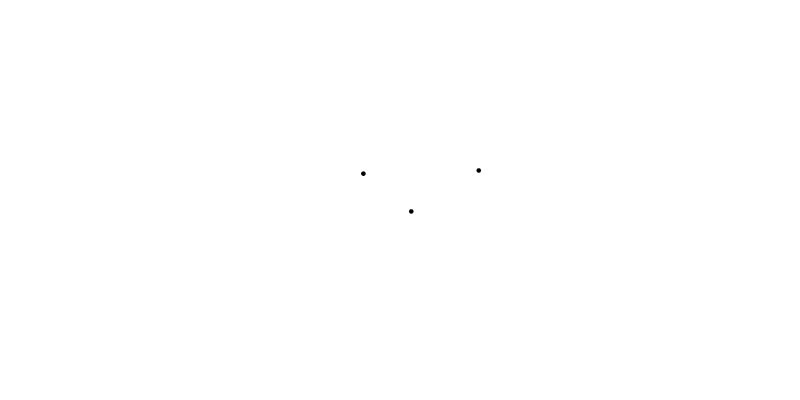

In [ ]:
while True:

    #visualize data stored in df   
    RmakePlot = robjects.globalenv['makePlot']    #make plot from df stored in R session
    p = RmakePlot()
    #time.sleep(0.00001)
    clear_output(wait=True)
    display(image_png(p)) 
    
    #clear df 
    RcreateDf = robjects.globalenv['createDf']
    RcreateDf()
    
    #calculate next step & update df
    for i in obj.existing_objs:
        i.updateObjA()
        i.updateObjVP()
        RaddObj([str(i.id), float(i.posx), float(i.posy)])